# IMPORTING LIBRARIES

In [134]:
import pandas as pd
import numpy as np
import plotly.express as px
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# IMPORTING THE DATASET AND INITIAL ANALYSIS

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Checking the shape of the dataframe

In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# DATA PREPARATION

### Handling null values

Let's check if there are any null values in the dataframe

In [7]:
null_df = df.isnull().sum().to_frame().reset_index()
null_df.columns = ['Column Name', 'Null values']

In [8]:
null_df = null_df.sort_values('Null values', ascending=False)

In [9]:
null_df.head(20)

,Column Name,Null values
72,PoolQC,1453
74,MiscFeature,1406
6,Alley,1369
73,Fence,1179
57,FireplaceQu,690
3,LotFrontage,259
59,GarageYrBlt,81
64,GarageCond,81
58,GarageType,81
60,GarageFinish,81


Let's create a percentage column to see the percentage of null values

In [10]:
null_df['percentage'] =  null_df['Null values'].apply(lambda x: (x/df.shape[0]) * 100)

In [11]:
null_df.head(20)

,Column Name,Null values,percentage
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
57,FireplaceQu,690,47.260274
3,LotFrontage,259,17.739726
59,GarageYrBlt,81,5.547945
64,GarageCond,81,5.547945
58,GarageType,81,5.547945
60,GarageFinish,81,5.547945


Dropping the column with over 30% of null values

In [12]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

Dealing with rest of the null values using imputation

In [13]:
df.isnull().sum().to_dict()

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fireplaces': 0,
 'G

Lot frontage is the Linear feet of street connected to property. It is a numerical property whose null values can be handled by mean of the values

In [14]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

MasVnrType:  Masonry veneer type.

It is a categorical variable 

In [15]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode())

MasVnrArea: Masonry veneer area in square feet

In [16]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

BsmtQual: Evaluates the height of the basement

In [17]:
mode = df['BsmtQual'].mode()

In [18]:
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, mode[0])

BsmtCond: Evaluates the general condition of the basement


In [19]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [20]:
mode = df['BsmtCond'].mode()
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, mode[0])

In [21]:
df['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

BsmtExposure: Refers to walkout or garden level walls

In [22]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [23]:
mode = df['BsmtExposure'].mode()
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, mode[0])

In [24]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

BsmtFinType1: Rating of basement finished area


In [25]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [26]:
mode = df['BsmtFinType1'].mode()
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, mode[0])

In [27]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

BsmtFinType2: Rating of basement finished area (if multiple types)

In [28]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [29]:
mode = df['BsmtFinType2'].mode()
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, mode[0])

In [30]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

Electrical: Electrical system

In [31]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [32]:
mode = df['Electrical'].mode()
df['Electrical'] = df['Electrical'].replace(np.nan, mode[0])

In [33]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

GarageType: Garage location

In [34]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [35]:
mode = df['GarageType'].mode()
df['GarageType'] = df['GarageType'].replace(np.nan, mode[0])

In [36]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

GarageYrBlt: Year garage was built

Dropping the null values since mode may not be the best method of imputation

In [37]:
df = df[df['GarageYrBlt'].isna() == False]

GarageFinish: Interior finish of the garage


In [38]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin'], dtype=object)

No null values in the column

GarageQual: Garage quality

In [39]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

No null values in garage qual

GarageCond: Garage condition

In [40]:
df['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

NO null values in garagecond

In [41]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

No more null values remaining

### Checking for duplicated rows

In [42]:
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There are no duplicate rows in the dataframe

### Dropping column ID

Dropping id from the dataframe as it has no significance

In [43]:
df.drop(['Id'], axis=1, inplace=True)

### Handling columns that have only one value

checking if the columns have only one value

In [44]:
df.columns[df.nunique() <= 1]

Index([], dtype='object')

All columns have atleast two or more values

### Creating derived variables

In [45]:
df['Age'] = df['YrSold'] - df['YearBuilt']
df['Remod_Age'] = df['YrSold'] - df['YearRemodAdd']
df['Garage_Age'] = df['YrSold'] - df['GarageYrBlt']
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

C:\Users\janesaldanha\AppData\Local\Temp\ipykernel_30968\2325558145.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)


### Handling numerical features

Looking at different data types

In [46]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [47]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

Let's look at the numeric columns

In [48]:
df_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'Age', 'Remod_Age', 'Garage_Age'],
      dtype='object')

#### Let's have a peak at the outliers

In [49]:
vars = df_numeric.columns
fig = make_subplots(rows=10, cols=4)
row = 1
col = 1
for i, var in enumerate(vars):
    
    fig.add_trace(
        go.Box(y=df_numeric[var],
        name=var),
        row=row, col=col
    )
    if col % 4 == 0:
        row = row + 1
        col = 1
    else:
        col = col + 1

fig.update_traces(jitter=.3)
fig.update_layout(
    autosize=False,
    width=800,
    height=2000)

In [50]:
def outlier_check(df1):
    outliers = dict()
    for feature in df1.columns:
        iqr = df1[feature].quantile(.75) - df1[feature].quantile(.25)
        outliers_count = len(df1[(df1[feature]>(df1[feature].quantile(.75)+1.5*iqr)) | (df1[feature]<(df1[feature].quantile(.25)-1.5*iqr))])
        outliers[feature] = round(outliers_count/df1.shape[0] * 100, 2)
    outlier_df=pd.DataFrame({'Columns':list(outliers.keys()),'Percentage':list(outliers.values())})
    outlier_df.sort_values(by="Percentage", ascending=False, inplace=True)
    return outlier_df

In [51]:
outlier_df = outlier_check(df_numeric)
print(outlier_df)

          Columns  Percentage
26  EnclosedPorch       13.49
7      BsmtFinSF2       11.82
28    ScreenPorch        8.41
4     OverallCond        7.98
1     LotFrontage        7.11
0      MSSubClass        6.38
5      MasVnrArea        6.24
2         LotArea        5.80
15   BsmtHalfBath        5.80
25    OpenPorchSF        5.00
32      SalePrice        4.28
9     TotalBsmtSF        3.92
19   KitchenAbvGr        3.77
30        MiscVal        3.55
23     GarageArea        3.34
24     WoodDeckSF        2.18
18   BedroomAbvGr        2.10
13      GrLivArea        2.10
20   TotRmsAbvGrd        2.03
8       BsmtUnfSF        1.96
27      3SsnPorch        1.74
12   LowQualFinSF        1.38
10       1stFlrSF        1.31
29       PoolArea        0.51
33            Age        0.44
6      BsmtFinSF1        0.44
21     Fireplaces        0.36
22     GarageCars        0.36
11       2ndFlrSF        0.15
3     OverallQual        0.00
34      Remod_Age        0.00
17       HalfBath        0.00
31        

Instead of deleting the outliers we will replace them with the median , a form of static imputation

In [52]:
for outlier in outlier_df['Columns']:
        IQR = df[outlier].quantile(.75) - df[outlier].quantile(.25) 
        max_value = df[outlier].quantile(.75)+1.5*IQR
        min_value = df[outlier].quantile(.25)-1.5*IQR
        df[outlier][df[outlier] > max_value] = df[outlier].median()
        df[outlier][df[outlier] < min_value ] = df[outlier].median()

Obtaining a new numeric df

In [53]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

Let's look at the box plot again

Analysing the numeric data

In [54]:
vars = df_numeric.columns
fig = make_subplots(rows=10, cols=4)
row = 1
col = 1
for i, var in enumerate(vars):
    
    fig.add_trace(
        go.Box(y=df_numeric[var],
        name=var),
        row=row, col=col
    )
    if col % 4 == 0:
        row = row + 1
        col = 1
    else:
        col = col + 1

fig.update_traces(jitter=.3)
fig.update_layout(
    autosize=False,
    width=800,
    height=2000)

Removing columns that have only one unique values

In [55]:
cols_to_remove = df_numeric.columns[df_numeric.nunique() <= 1]

In [56]:
df.drop(cols_to_remove, axis=1, inplace=True)

In [57]:
df_numeric = df_numeric[df_numeric.columns[df_numeric.nunique() > 1]]

In [58]:
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,Age,Remod_Age,Garage_Age
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,0,2,548,0,61,2,208500,5,5,5.0
1,20,80.0,9600,6,5,0.0,978,284,1262,1262,...,1,2,460,298,0,5,181500,31,31,31.0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,2,608,0,42,9,223500,7,6,7.0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,1,3,642,0,35,2,140000,91,36,8.0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,3,836,192,84,12,250000,8,8,8.0


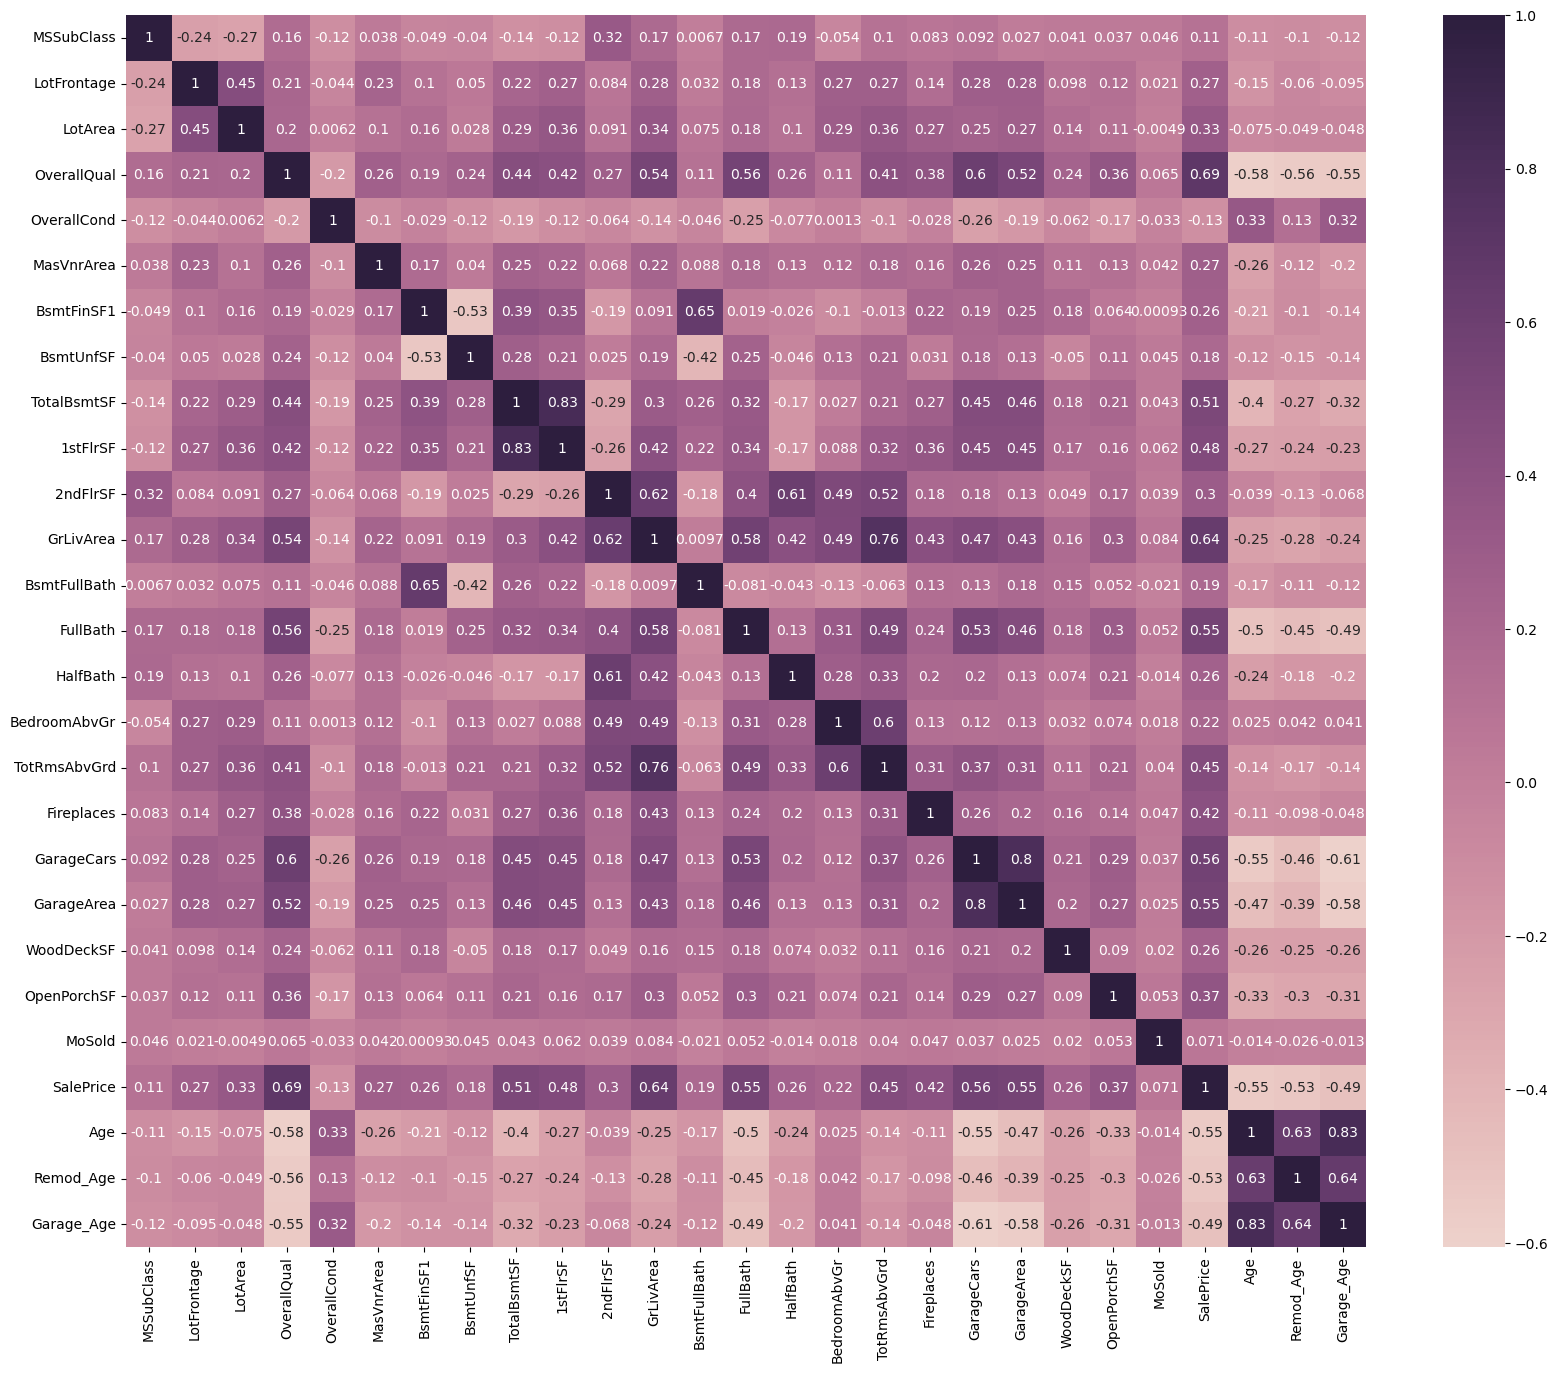

In [59]:
plt.figure(figsize=(20,16))
sns.heatmap(df_numeric.corr(),annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

As we can see that column like

Age has a strong correlation with Garage Age

GarageAge has strong corelation with Remond_Age

SalesPrice has strong correlation with OverllQual, GrLivArea

TotRmsAbvGrd has strong correlation with GrLivArea





#### Exploratory data analysis

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



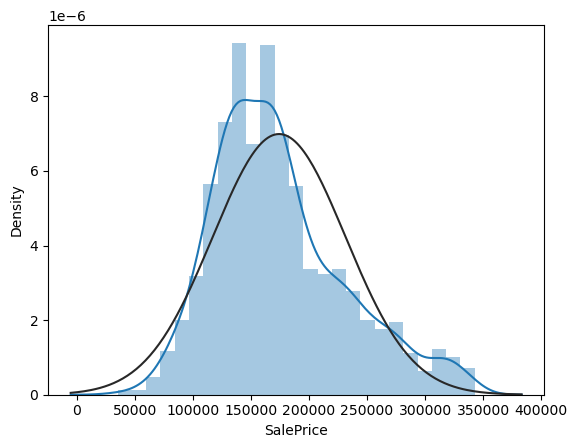

In [62]:
sns.distplot(df['SalePrice'], fit=norm)
plt.show()

We can see that the data is slightly skewed towards left.

Lets understand the distribution of the numerical features in the data

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\janesal

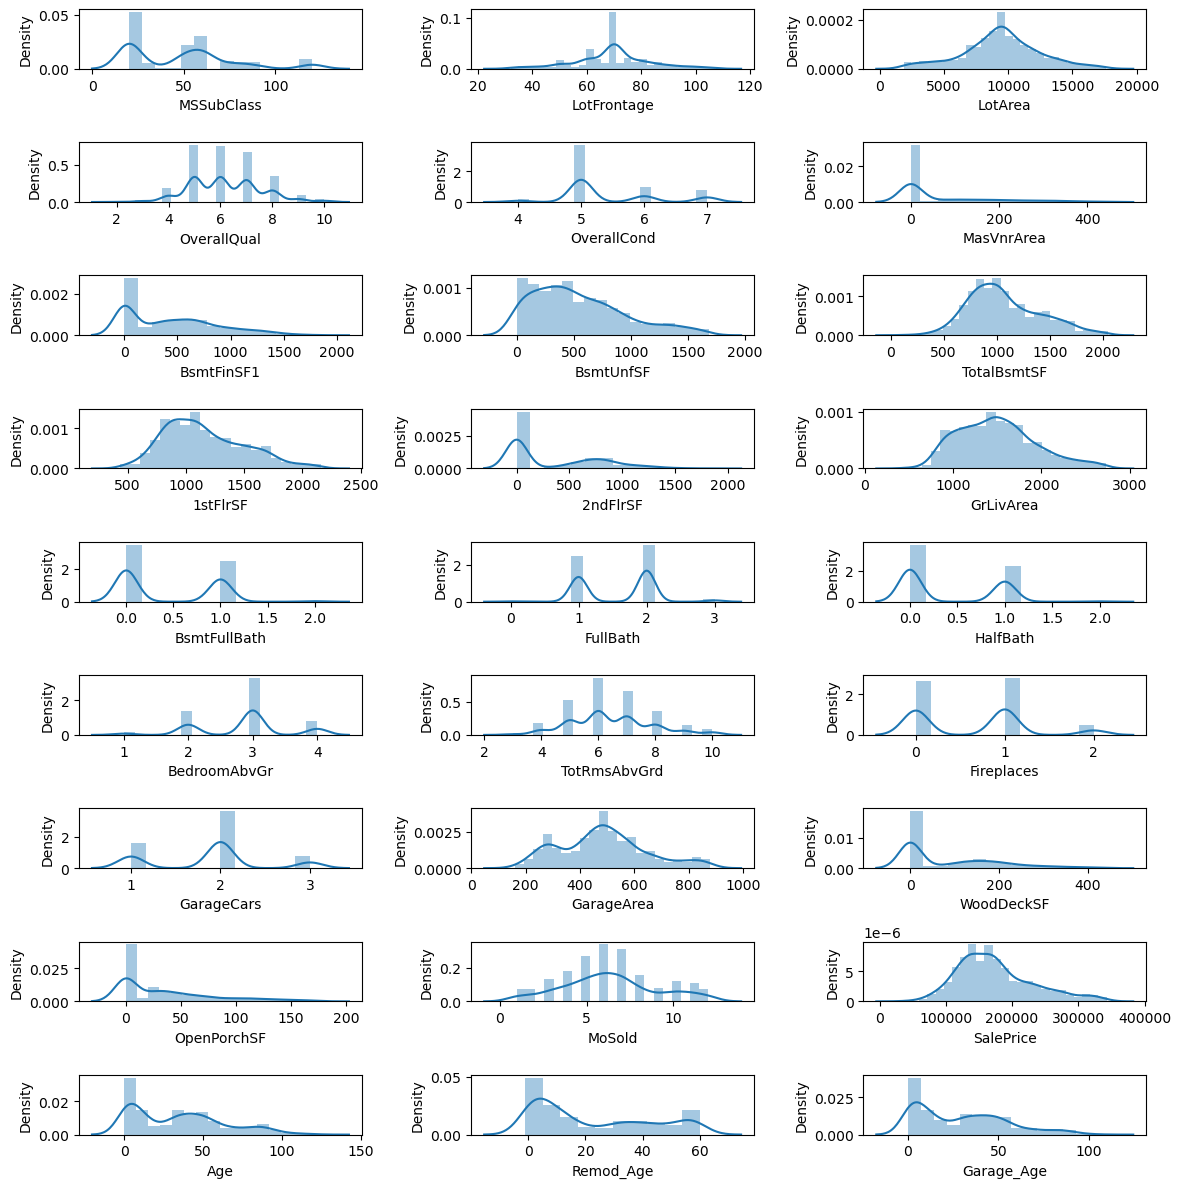

In [63]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(df_numeric.columns):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(df[feature])
    plt.tight_layout()

Columns like GarageCards, BsmtFullBath, Fireplaces are not continuous variables where as garage_age , remod_age are continuous.

In the column MasVnrArea majority of the values are 0 hence the graph distribution.

Let's see the distribution of each of these variables with SalesPrice

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\janesaldanha\Anaconda3\lib\site-packa

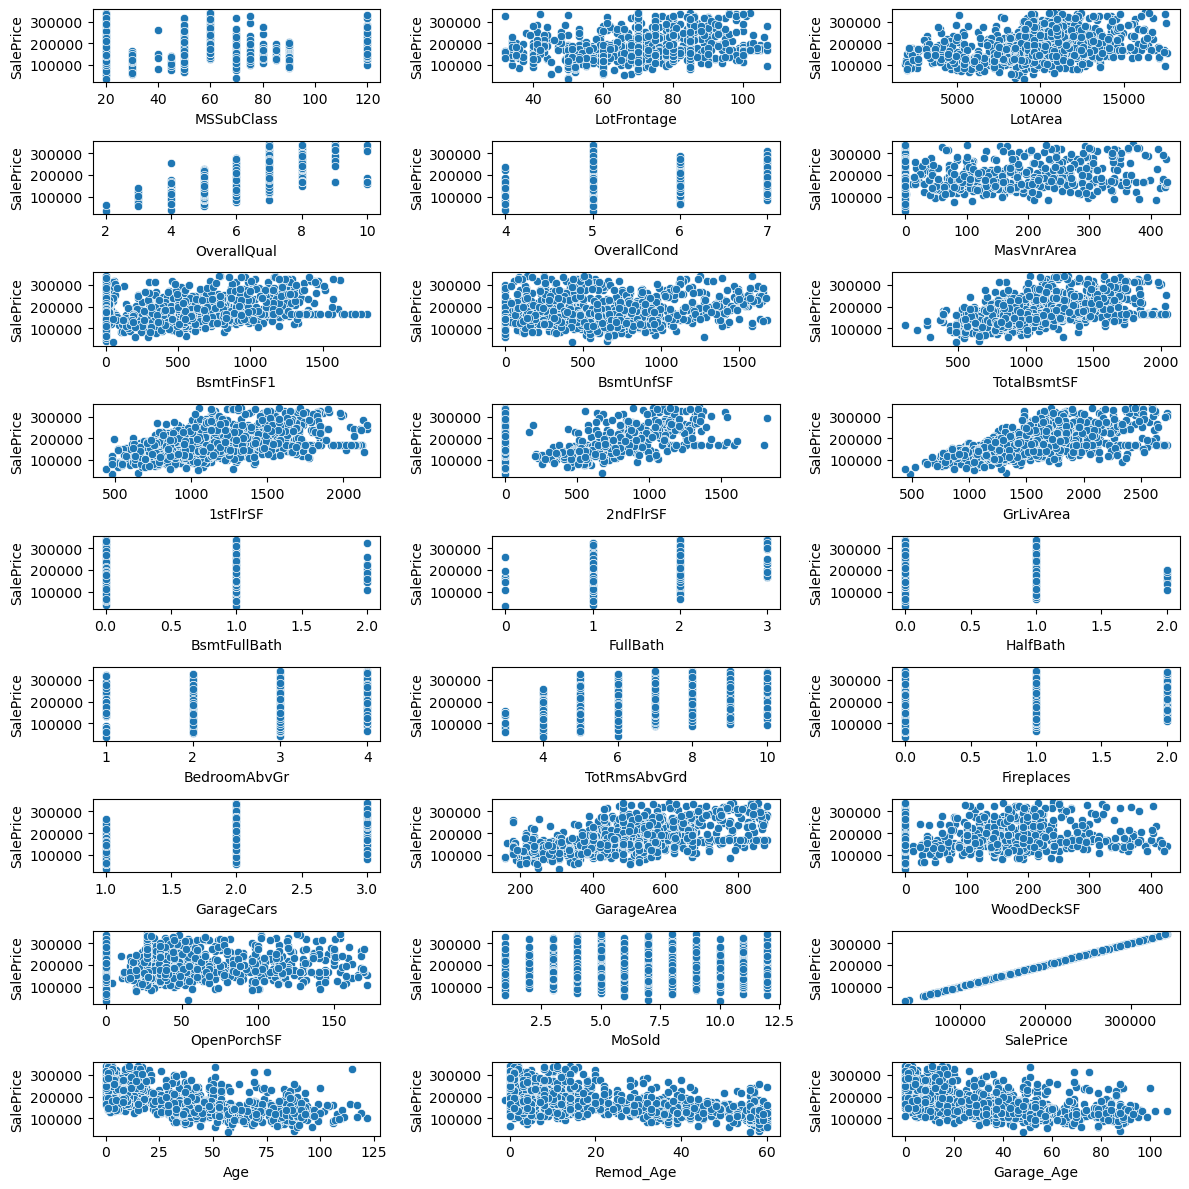

In [72]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(df_numeric.columns):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(df[feature], df['SalePrice'])
    plt.tight_layout()

We can see clear patterns with GarageArea where it increases linearly with the SalePrice,
 
Age : as the age increases the prices reduce, the same pattern is for remod_age and garage_age

GrLivArea increases as the sales prices increases. so is the trend with 1stFlrSF and 2ndFlrSF

Let's have different plots for the numerical categorical variables to understand its distribution

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\janesaldanha\Anaconda3\lib\site-packa

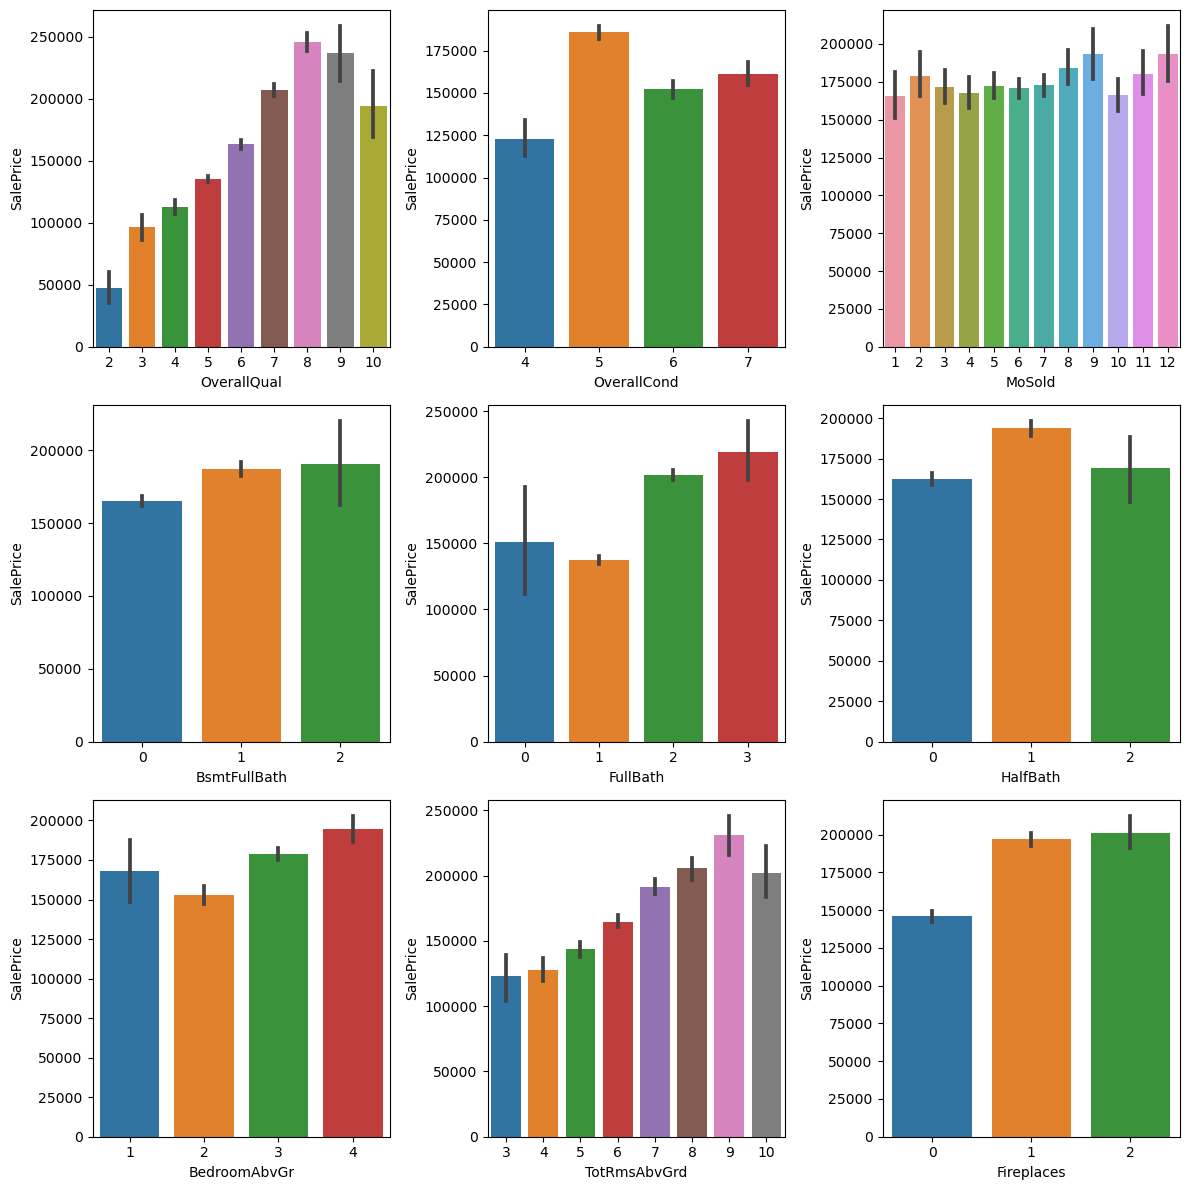

In [77]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(df[feature], df['SalePrice'])
    plt.tight_layout()

The Sale prices is the highest when the overall quality is 8 and 9. It increases for all the values except 10 where we see that there is a reduction

The Sales price is highest for overall condition 5

for MOSold the values are relatively comparable

The prices for 2 Bsmt full baths are relatively more than 1

In full baths we see a clear distinction , where the prices for 3 full baths is higher and for 1 bath is the lowest 

In case of half bath , 1 half bath prices are the highest

The prices for BedroomAbvGr is highest for 4 and lowest for 2

The price is highest for totRmsAbvGrd = 9

The houses with 2 fireplaces have highest sale price



### Analysing Categorical variables

In [81]:
categorical_df = df.select_dtypes(include=['object'])

In [88]:
categorical_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [90]:
categorical_df.shape

(1379, 38)

In [92]:
def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 40))
    for i, feature in enumerate(feature_list):
        plt.subplot(19, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(df['SalePrice'], df[feature])
        plt.tight_layout()

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\janesaldanha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\janesaldanha\Anaconda3\lib\site-packa

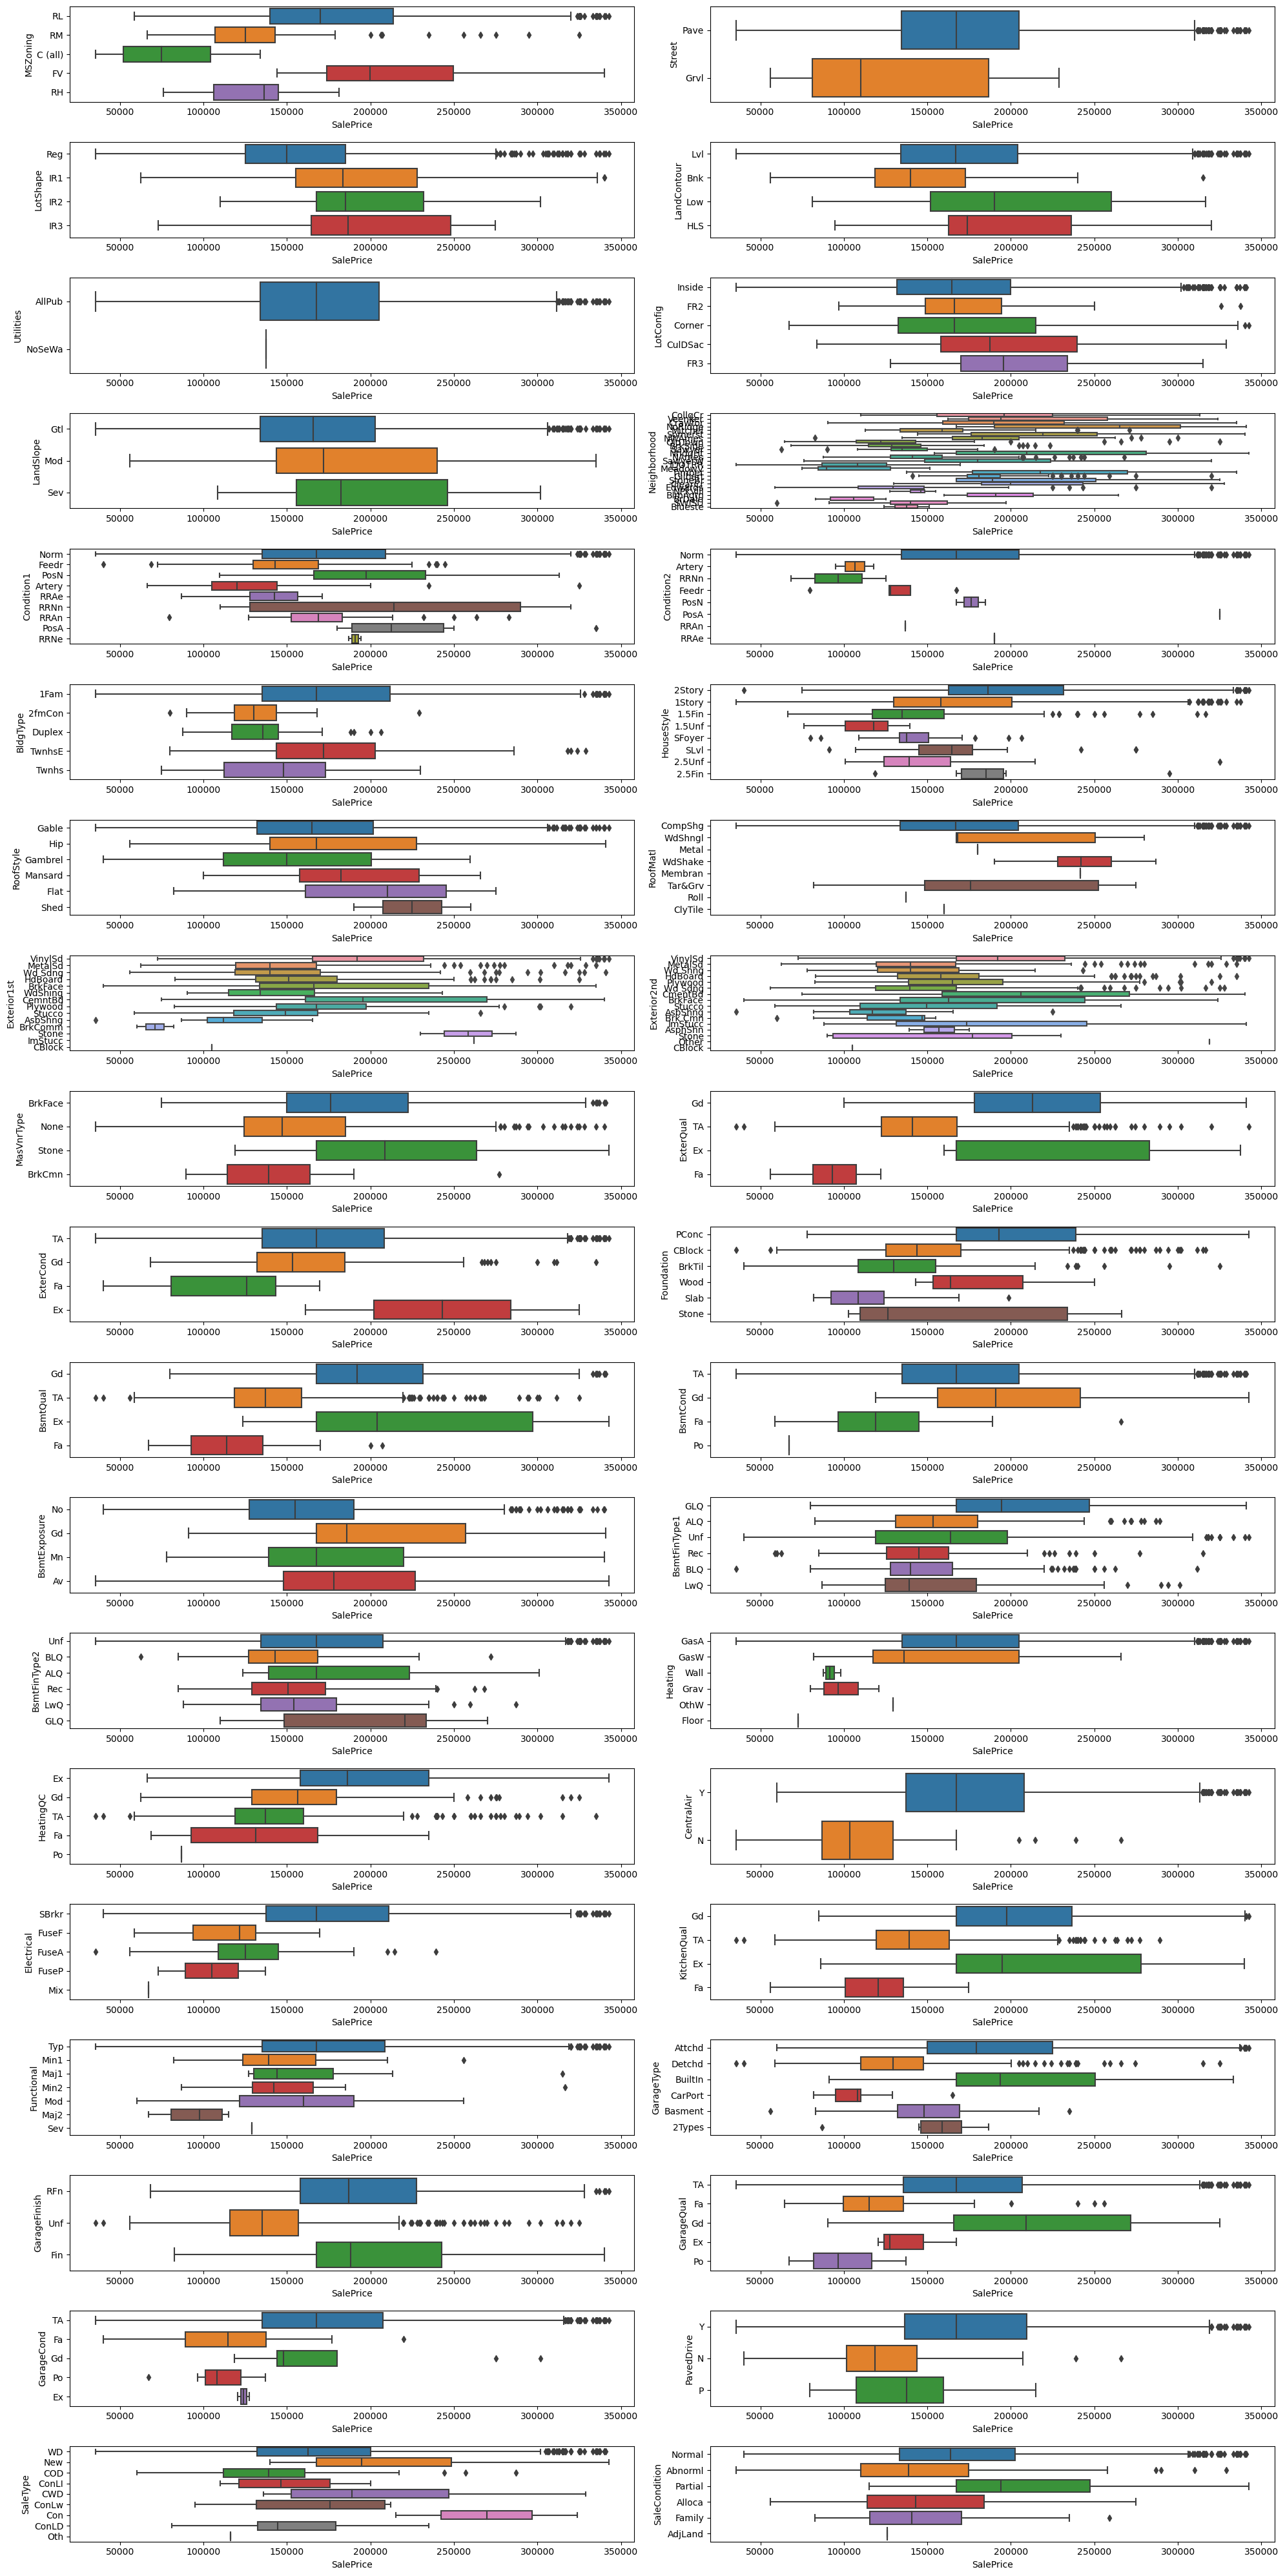

In [93]:
generate_boxplot(categorical_df.columns)

Let's read these plots for some inference

1. In the MSZoning plot we see that floating village residential has the higher range of sale prices followed by Resdiential Low Density and commercial has the lowest range

2. Houses with pavement have higher price range

3. Houses with general shape of property have lower sale price compared to irregular shaped houses.

4. Land Contour with depression seems to have higher prices SalePrices

5. We see that there is only one value for NoSeWa hence we should drop the column since it is highly skewed

6. Lot Configuration with frontage on 3 sides has the highest median but the range of values is highest for corner lot.

7. LandSlope: In places the landslope takes places in moderation the price ranges are vast and is lower where the landslope is low.

8. GarageType: Builtin garage have the highest median of prices but attached garage has the varied range. 

9. SaleCondition: The sale prices is higher for the Partial category which means unfinished/ new homes have higher value

10. PavedDrive: The houses that have paved driveway have higher sale prices compared to the rest.

11. GarageQual: There might probably been some imbalance since the range of values of prices is highest for Good garage quality and lesser for excellent

12. GarageFinish: Finished garages have higher values of prices

In [96]:
df['Utilities'].value_counts()

AllPub    1378
NoSeWa       1
Name: Utilities, dtype: int64

Dropping utilities column since there is only one value for NoSeWa

In [98]:
df.drop(['Utilities'], axis=1, inplace=True)

### Encoding the categorical variables

In [100]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,Age,Remod_Age,Garage_Age
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,Y,0,61,2,WD,Normal,208500,5,5,5.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,Y,298,0,5,WD,Normal,181500,31,31,31.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,Y,0,42,9,WD,Normal,223500,7,6,7.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,Y,0,35,2,WD,Abnorml,140000,91,36,8.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,Y,192,84,12,WD,Normal,250000,8,8,8.0


In [102]:
df = pd.get_dummies(df, drop_first=True)

In [103]:
df.shape

(1379, 220)

# SPLITTING THE DATA TO TRAIN AND TEST

In [104]:
X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,5,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [107]:
y = df['SalePrice']
print(y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1379, dtype: int64


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [111]:
print("Dimensions of the train and test data:")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Dimensions of the train and test data:
(1103, 219)
(276, 219)
(1103,)
(276,)


Standardizing the data

In [115]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [116]:
X_train_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

Function to check the top n features

In [118]:
def top_n_features(n, X_train_scaled, y_train):
    top_n_cols = []
    
    linear_m = LinearRegression()
    rfe = RFE(linear_m, n_features_to_select = n)
    rfe = rfe.fit(X_train_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

Building linear regression model

In [119]:
def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())    

Now lets compare the number of features that will be the best

n = 200

In [121]:
top_200 = top_n_features(200, X_train_scaled, y_train)

Top 200 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Age', 'Remod_Age', 'Garage_Age', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timb

In [122]:
build_regressor(X_train_scaled,y_train, top_200)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     19.61
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          2.24e-225
Time:                        09:54:25   Log-Likelihood:                -12720.
No. Observations:                1103   AIC:                         2.583e+04
Df Residuals:                     907   BIC:                         2.681e+04
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.732e+

n = 100

In [123]:
top_100 = top_n_features(100, X_train_scaled, y_train)

Top 100 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'Age', 'Remod_Age', 'Garage_Age', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'LandSlope_Mod', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_RRNn', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_Stone', 'Exterior1

In [124]:
build_regressor(X_train_scaled,y_train, top_100)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     40.92
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          2.28e-285
Time:                        09:55:04   Log-Likelihood:                -12750.
No. Observations:                1103   AIC:                         2.570e+04
Df Residuals:                    1005   BIC:                         2.619e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.732e+

n = 75

In [125]:
top_75 = top_n_features(75,  X_train_scaled, y_train)

Top 75 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageCars', 'GarageArea', 'Age', 'Remod_Age', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Mod', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_Norm', 'Condition1_RRNn', 'Condition2_PosA', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1Story', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_Stone', 'Exterior2nd_CBlock', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Gd', 'ExterQual_TA

In [126]:
build_regressor(X_train_scaled,y_train, top_75)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     53.54
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          4.69e-297
Time:                        09:55:37   Log-Likelihood:                -12773.
No. Observations:                1103   AIC:                         2.569e+04
Df Residuals:                    1030   BIC:                         2.606e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.732e+

n = 50

In [128]:
top_50 = top_n_features(50,  X_train_scaled, y_train)

Top 50 features : 
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'GarageCars', 'GarageArea', 'Age', 'Remod_Age', 'MSZoning_FV', 'MSZoning_RL', 'LandSlope_Mod', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition2_PosA', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1Story', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_BrkFace', 'Exterior2nd_Other', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Gd', 'BsmtCond_Gd', 'BsmtCond_TA', 'BsmtFinType1_Unf', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Functional_Typ', 'SaleType_ConLI', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']


In [129]:
build_regressor(X_train_scaled,y_train, top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     75.43
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          1.26e-306
Time:                        09:56:44   Log-Likelihood:                -12801.
No. Observations:                1103   AIC:                         2.570e+04
Df Residuals:                    1053   BIC:                         2.595e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.732e+

Going with n = 100 features because it gave max adjusted  R^2

In [147]:
X_train_rfe = X_train_scaled[top_100]
X_test_rfe = X_test_scaled[top_100]

Generalized code for the model

In [148]:
def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

### RIDGE REGRESSION

In [153]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.79667462377003
R2 score (test) :  0.7393734381015321
RMSE (train) :  25416.551303587978
RMSE (test) :  30428.935893270715


### LASSO

In [150]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\janesaldanha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.047e+10, tolerance: 2.832e+08

c:\Users\janesaldanha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.502e+08, tolerance: 2.774e+08

c:\Users\janesaldanha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.549e+10, tolerance: 2.736e+08

c:\Users\janesaldanha\Anaconda3\lib\site-packa

Optimum alpha for lasso is 500.000000
lasso  Regression with  500
R2 score (train) :  0.7813369589020375
R2 score (test) :  0.7376628552045839
RMSE (train) :  26357.761366026843
RMSE (test) :  30528.630430353278


In [151]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=20)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=500)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

C:\Users\janesaldanha\AppData\Local\Temp\ipykernel_30968\379236478.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Ridge (alpha=20),Lasso (alpha=500)
MSSubClass,3530.847673,1574.270039
LotFrontage,1951.951484,981.467069
LotArea,4217.936678,3598.031393
OverallQual,6980.906014,6691.723892
OverallCond,3787.864556,3767.075037
MasVnrArea,2700.267859,1911.302607
BsmtFinSF1,-1715.037203,0.000000
BsmtUnfSF,-964.028699,-0.000000
TotalBsmtSF,9222.394685,9079.085786
2ndFlrSF,7738.219847,2962.516625


In [152]:
model_coefficients[['Lasso (alpha=500)']].sort_values(by='Lasso (alpha=500)', ascending=False)

,Lasso (alpha=500)
GrLivArea,15636.801878
TotalBsmtSF,9079.085786
OverallQual,6691.723892
ExterQual_Gd,5642.053971
Functional_Typ,4518.022877
SaleCondition_Normal,4344.438506
Neighborhood_Somerst,4297.062663
BsmtQual_Gd,4136.590544
GarageArea,3810.545945
OverallCond,3767.075037
